# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

The time index of "pr" is not correct, thus we have additional function to resolve this issue

In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=False)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


def regrid_data_2006_pr(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        huss_ds = xr.open_dataset(CMIP_dir+mod+"/huss_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")["huss"]
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        temp_ds = temp_ds.assign_coords(time = huss_ds.indexes['time'])
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=False)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)    
    
    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=False)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)

    
def regrid_data_2061_pr(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        huss_ds = xr.open_dataset(CMIP_dir+mod+"/huss_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")["huss"]
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        temp_ds = temp_ds.assign_coords(time =  huss_ds.indexes['time'])
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=False)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)    
    
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    temp_var.append(regrid_data_2006_pr("pr", start_year, end_year, interval, height=False))
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))
    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    temp_var.append(regrid_data_2061_pr("pr", start_year, end_year, interval, height=False))
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))
    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] + df["rsus"]
    df["FLNS"] = -(df["rlus"] + df["rlds"])
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "ACCESS1-3"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process pr******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/pr_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 4.66905665397644 to load the data
*********Start to merge*********
It takes elapsed_time 0.030858755111694336 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.209636449813843 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.038212537765503 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6535251140594482 to mask the layer
*********Start to plot the layer*********


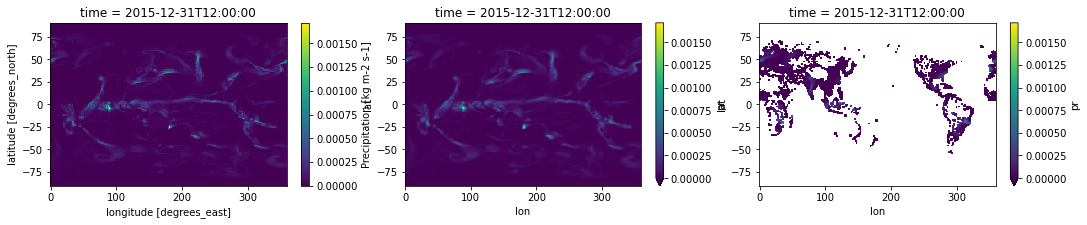

It takes elapsed_time 0.6620745658874512 to plot the layer
It takes elapsed_time 33.2642707824707 to deal with pr in total
******End pr******


******Start to process huss******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/huss_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.8971214294433594 to load the data
*********Start to merge*********
It takes elapsed_time 0.034357547760009766 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.52581524848938 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.984383583068848 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6704487800598145 to mask the layer
*********Start to plot the layer*********


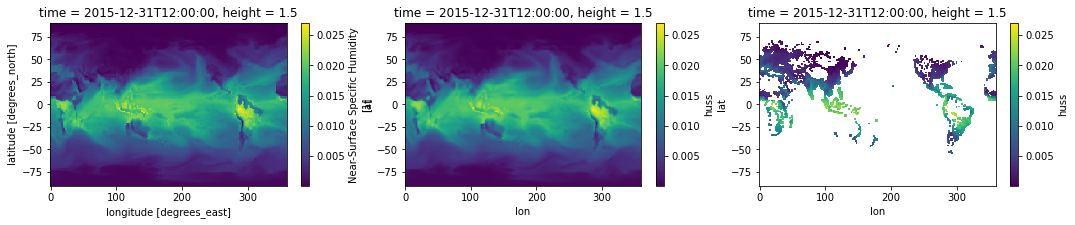

It takes elapsed_time 0.6632745265960693 to plot the layer
It takes elapsed_time 30.776147842407227 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/tas_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.992727279663086 to load the data
*********Start to merge*********
It takes elapsed_time 0.03513646125793457 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.48834991455078 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.991507053375244 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6746218204498291 to mask the layer
*********Start to plot the layer*********


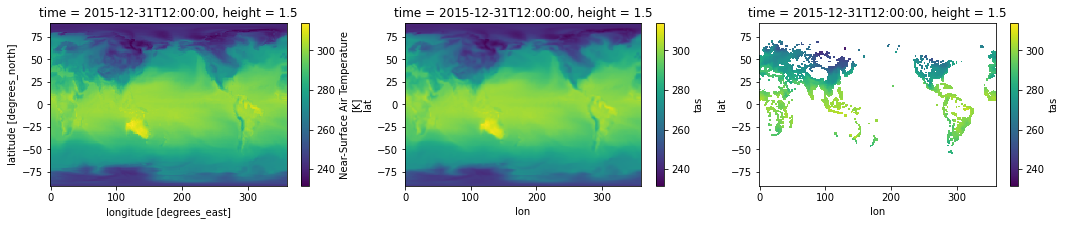

It takes elapsed_time 0.6692345142364502 to plot the layer
It takes elapsed_time 30.852856159210205 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/uas_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9098491668701172 to load the data
*********Start to merge*********
It takes elapsed_time 0.04639840126037598 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.608408451080322 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.001583099365234 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.665919303894043 to mask the layer
*********Start to plot the layer*********


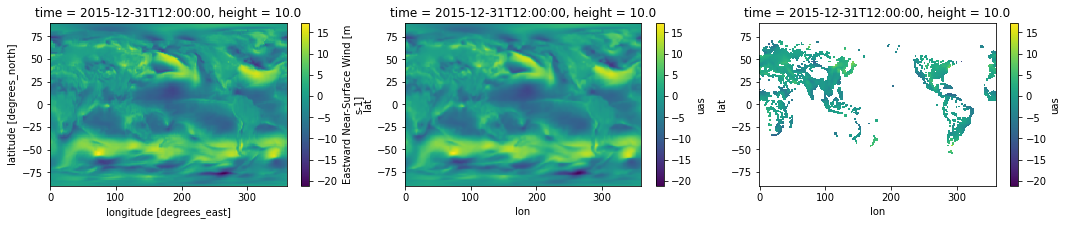

It takes elapsed_time 0.7012698650360107 to plot the layer
It takes elapsed_time 30.93480157852173 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/vas_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.833120346069336 to load the data
*********Start to merge*********
It takes elapsed_time 0.039443254470825195 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.481762647628784 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.07276463508606 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6561861038208008 to mask the layer
*********Start to plot the layer*********


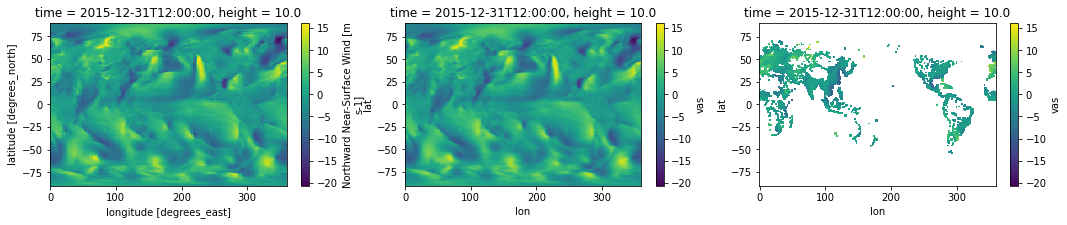

It takes elapsed_time 0.686945915222168 to plot the layer
It takes elapsed_time 30.771230459213257 to deal with vas in total
******End vas******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/prsn_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.13499116897583 to load the data
*********Start to merge*********
It takes elapsed_time 0.05005955696105957 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.48613452911377 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.008881568908691 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.665489912033081 to mask the layer
*********Start to plot the layer*********


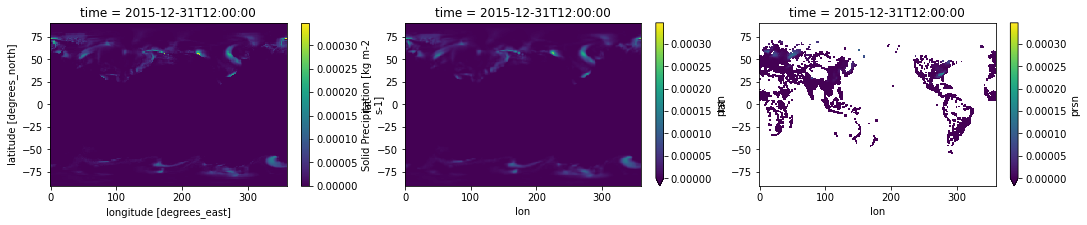

It takes elapsed_time 0.636174201965332 to plot the layer
It takes elapsed_time 30.982977390289307 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/rlds_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9855084419250488 to load the data
*********Start to merge*********
It takes elapsed_time 0.05057096481323242 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.42221999168396 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.045011520385742 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6543965339660645 to mask the layer
*********Start to plot the layer*********


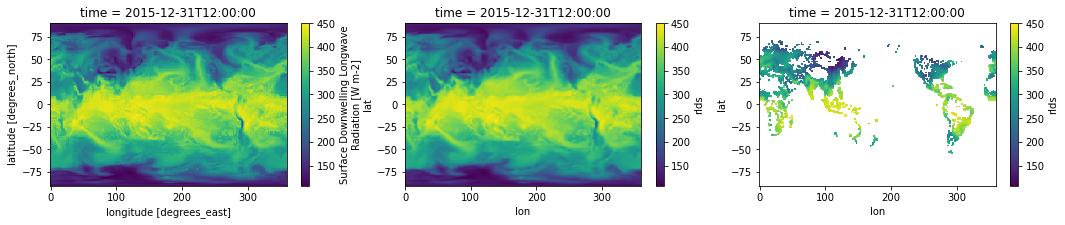

It takes elapsed_time 0.6530430316925049 to plot the layer
It takes elapsed_time 30.81175994873047 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/rlus_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.0277349948883057 to load the data
*********Start to merge*********
It takes elapsed_time 0.03840899467468262 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.41348123550415 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.051697969436646 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6598038673400879 to mask the layer
*********Start to plot the layer*********


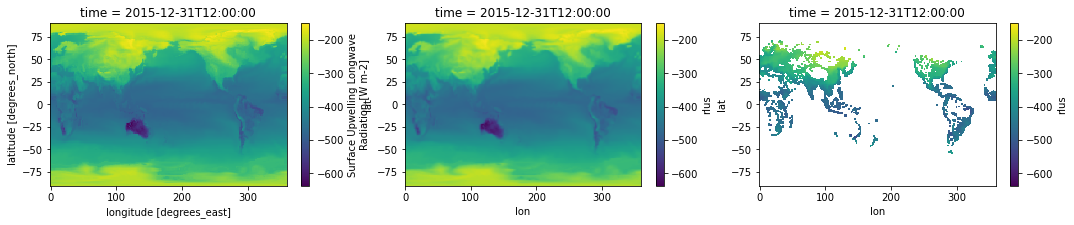

It takes elapsed_time 0.6245253086090088 to plot the layer
It takes elapsed_time 30.816802263259888 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/rsds_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.4239068031311035 to load the data
*********Start to merge*********
It takes elapsed_time 0.04878687858581543 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.782424449920654 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.1281156539917 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6693077087402344 to mask the layer
*********Start to plot the layer*********


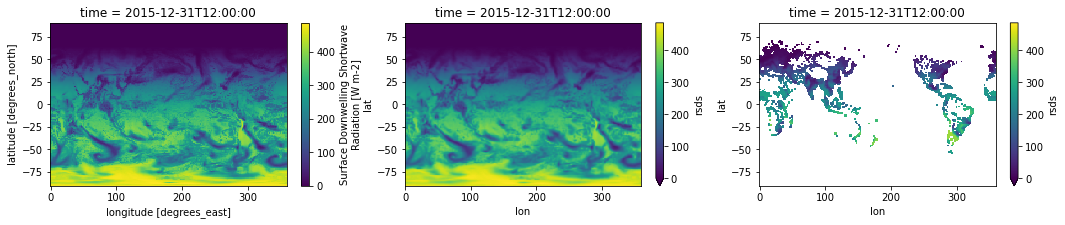

It takes elapsed_time 0.6439952850341797 to plot the layer
It takes elapsed_time 31.69752025604248 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/rsus_day_ACCESS1-3_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9575209617614746 to load the data
*********Start to merge*********
It takes elapsed_time 0.04255795478820801 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.82428550720215 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.212290287017822 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6611974239349365 to mask the layer
*********Start to plot the layer*********


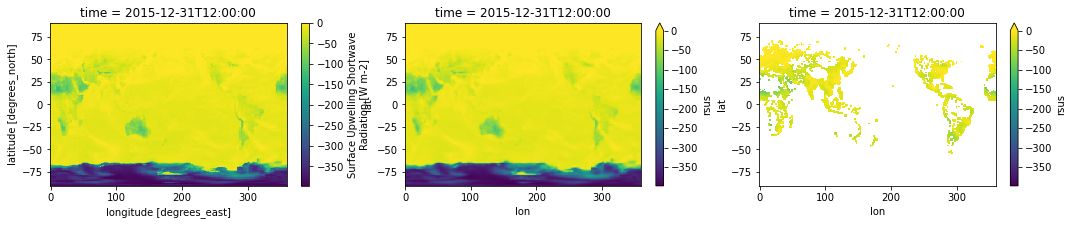

It takes elapsed_time 0.6663105487823486 to plot the layer
It takes elapsed_time 31.365171432495117 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2031, 25)

In [5]:
df = get_urban_df(ds)
del ds
gc.collect()

It takes elapsed_time 33.388750314712524 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

13877

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

192.29939579963684


# Step 3: 2061-2070 

In [7]:
del df
gc.collect()

20

******Start to process pr******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/pr_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 3.9533677101135254 to load the data
*********Start to merge*********
It takes elapsed_time 0.032617807388305664 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.52081537246704 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.061774730682373 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6695566177368164 to mask the layer
*********Start to plot the layer*********


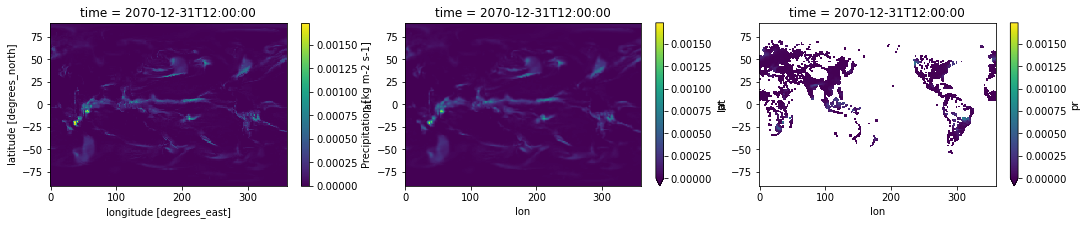

It takes elapsed_time 0.6570498943328857 to plot the layer
It takes elapsed_time 32.896254539489746 to deal with pr in total
******End pr******


******Start to process huss******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/huss_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0084238052368164 to load the data
*********Start to merge*********
It takes elapsed_time 0.046900272369384766 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.492602348327637 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.163187980651855 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6966986656188965 to mask the layer
*********Start to plot the layer*********


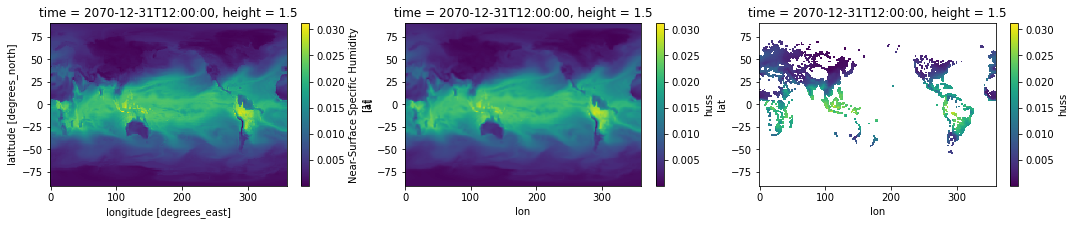

It takes elapsed_time 0.7227349281311035 to plot the layer
It takes elapsed_time 31.131396532058716 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/tas_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0874485969543457 to load the data
*********Start to merge*********
It takes elapsed_time 0.06442523002624512 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.894890069961548 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.079875946044922 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6737844944000244 to mask the layer
*********Start to plot the layer*********


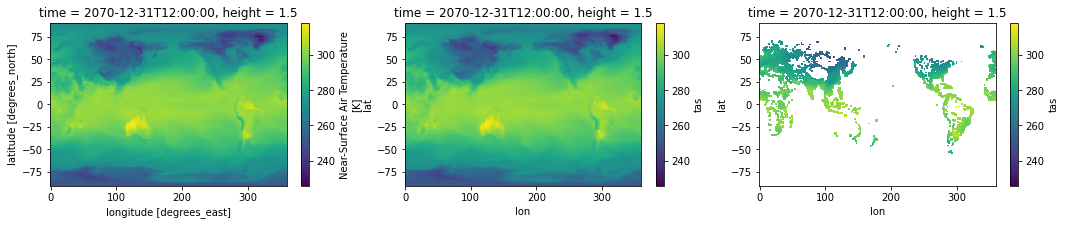

It takes elapsed_time 0.6773366928100586 to plot the layer
It takes elapsed_time 31.47977375984192 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/uas_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9719552993774414 to load the data
*********Start to merge*********
It takes elapsed_time 0.052121639251708984 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.83840775489807 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.995018243789673 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6663064956665039 to mask the layer
*********Start to plot the layer*********


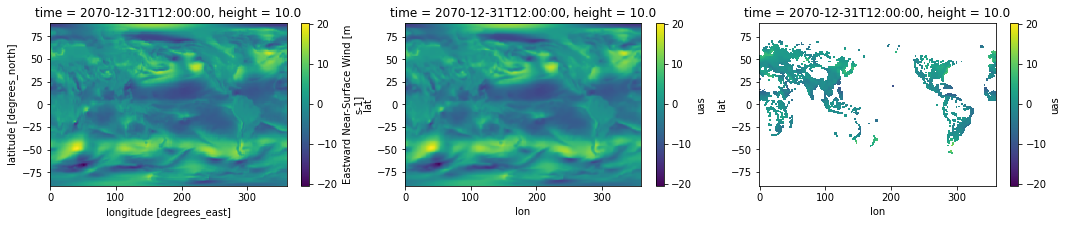

It takes elapsed_time 0.6483557224273682 to plot the layer
It takes elapsed_time 31.17296528816223 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/vas_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0386624336242676 to load the data
*********Start to merge*********
It takes elapsed_time 0.04973316192626953 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.57955241203308 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.025209188461304 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6678295135498047 to mask the layer
*********Start to plot the layer*********


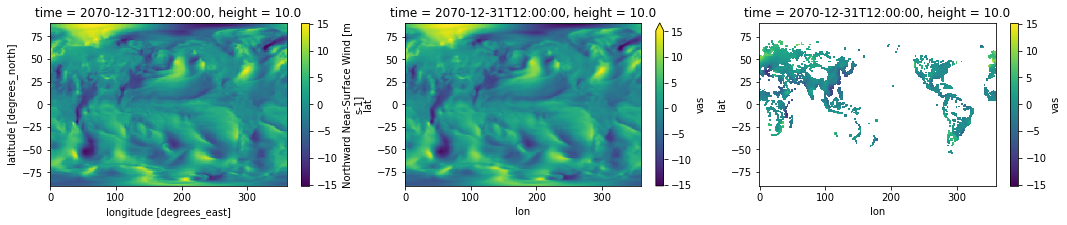

It takes elapsed_time 0.6853163242340088 to plot the layer
It takes elapsed_time 31.047082662582397 to deal with vas in total
******End vas******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/prsn_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.062563419342041 to load the data
*********Start to merge*********
It takes elapsed_time 0.05510711669921875 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.57553505897522 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.109683513641357 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6737551689147949 to mask the layer
*********Start to plot the layer*********


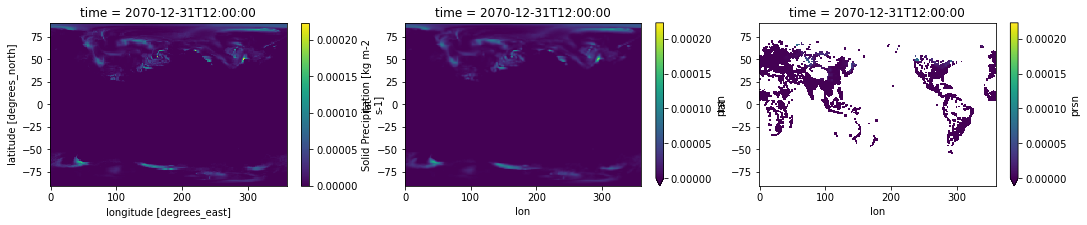

It takes elapsed_time 0.62522292137146 to plot the layer
It takes elapsed_time 31.102667570114136 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/rlds_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9613149166107178 to load the data
*********Start to merge*********
It takes elapsed_time 0.04771018028259277 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.608211040496826 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.163216590881348 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6681838035583496 to mask the layer
*********Start to plot the layer*********


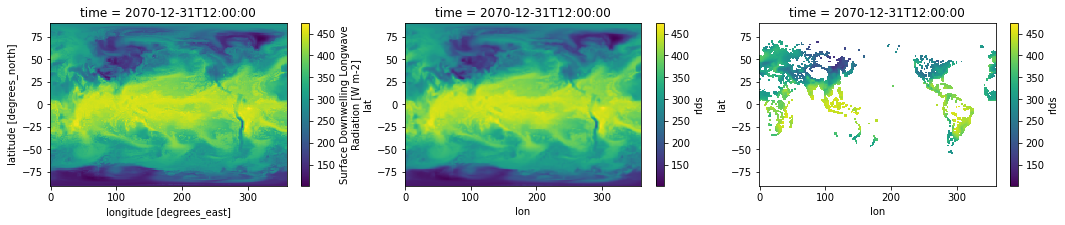

It takes elapsed_time 0.6764676570892334 to plot the layer
It takes elapsed_time 31.126072645187378 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/rlus_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0672037601470947 to load the data
*********Start to merge*********
It takes elapsed_time 0.05265092849731445 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.658679962158203 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.184102058410645 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6726226806640625 to mask the layer
*********Start to plot the layer*********


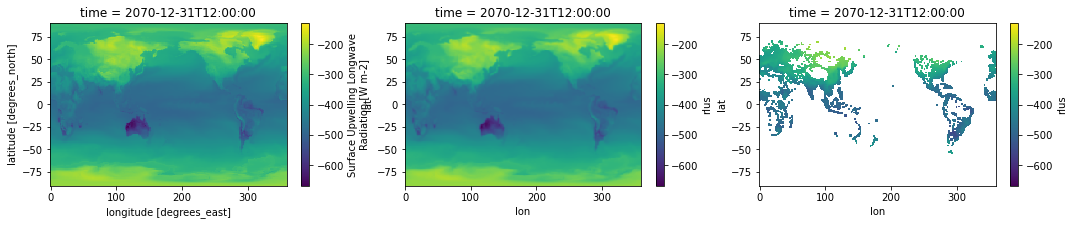

It takes elapsed_time 0.6460850238800049 to plot the layer
It takes elapsed_time 31.28254461288452 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/rsds_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9669444561004639 to load the data
*********Start to merge*********
It takes elapsed_time 0.049794912338256836 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.65158772468567 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.151897192001343 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6687660217285156 to mask the layer
*********Start to plot the layer*********


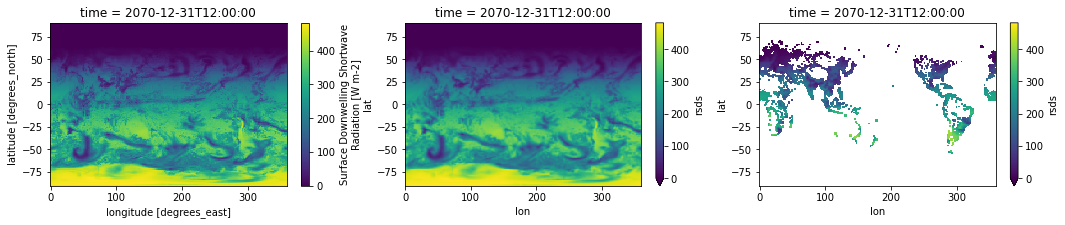

It takes elapsed_time 0.6458621025085449 to plot the layer
It takes elapsed_time 31.13667345046997 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-3/rsus_day_ACCESS1-3_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0557327270507812 to load the data
*********Start to merge*********
It takes elapsed_time 0.052530527114868164 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.65290069580078 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.114746332168579 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6826605796813965 to mask the layer
*********Start to plot the layer*********


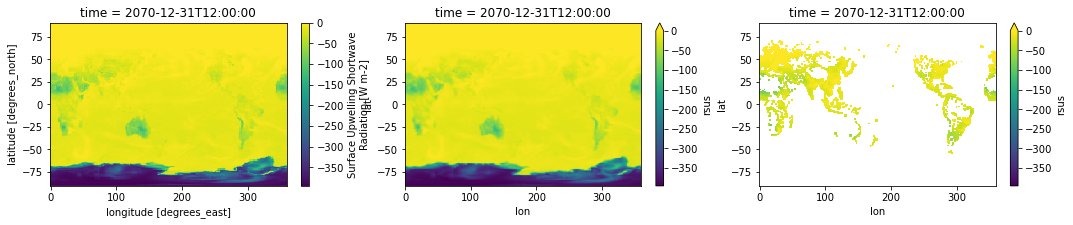

It takes elapsed_time 0.6858360767364502 to plot the layer
It takes elapsed_time 31.246131658554077 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2056, 2081, 25)

In [9]:
df = get_urban_df(ds)
del ds
gc.collect()

It takes elapsed_time 34.37919902801514 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

13877

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

192.11463260650635
